<a href="https://colab.research.google.com/github/arthur-timoteo/ciencia_de_dados/blob/main/Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise CSGO Competitive Matchmaking Data

## 1 Leitura dos dados com pandas

O dados do Dataset utilizado foram colhidos de competições ESEA organizadas pela ESL e contem dados de partidas publicas e partidas de treinamento entre as datas de 2017 e 2018. As informações contenplam as granadas que foram lançadas e o danos causados, dano que cada jogador causou no outro, metadados de cada rodada, coordenadas em cada mapa.

In [58]:
import pandas as pd

Lê o dataset com os metadados das rodadas:

In [59]:
csgo = pd.read_csv("https://raw.githubusercontent.com/arthur-timoteo/ciencia_de_dados/main/dados/esea_meta_demos.part1.csv",sep =',',encoding='ISO-8859-1', header=0)

Colunas do Dataset:

In [60]:
csgo.columns.values

array(['file', 'map', 'round', 'start_seconds', 'end_seconds',
       'winner_team', 'winner_side', 'round_type', 'ct_eq_val',
       't_eq_val'], dtype=object)

## 2 Manipulação e limpeza de dados com pandas

In [61]:
#Remover a coluna 'file' e renomeamos o nome das demais colunas
csgo = csgo.drop(['file'], axis=1)

# Renomeando colunas
csgo.rename(columns={'map': 'mapa', 'start_seconds': 'inicio_segundos', 'end_seconds': 'fim_segundos', 'winner_team': 'time_vencedor', 'winner_side': 'lado_vencedor', 'round_type': 'round_tipo', 'ct_eq_val': '$CounterTerrorist', 't_eq_val': '$Terrorist'}, inplace=True)

# Removemos os registros com os timer 'Team 1', 'Team 2' e '--to be determined--'
csgo = csgo[(csgo['time_vencedor'] != 'Team 1') & (csgo['time_vencedor'] != 'Team 2') & (csgo['time_vencedor'] != '--to be determined--')]

# Convertendo registros
csgo['lado_vencedor'] = pd.to_numeric(csgo['lado_vencedor'].map({'Terrorist': 0, 'CounterTerrorist': 1}))
csgo['round_tipo'] = pd.to_numeric(csgo['round_tipo'].map({'PISTOL_ROUND': 0, 'SEMI_ECO': 1,'ECO': 2, 'NORMAL': 3}))

csgo = csgo.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Colunas que serão utilizadas:

In [62]:
csgo.columns.values

array(['mapa', 'round', 'inicio_segundos', 'fim_segundos',
       'time_vencedor', 'lado_vencedor', 'round_tipo',
       '$CounterTerrorist', '$Terrorist'], dtype=object)

## 3 Descritivo e exploração de dados com pandas (groupby)

In [63]:
csgo.head()

,mapa,round,inicio_segundos,fim_segundos,time_vencedor,lado_vencedor,round_tipo,$CounterTerrorist,$Terrorist
0,de_overpass,1,94.30782,160.9591,Hentai Hooligans,0.0,0.0,4300,4250
1,de_overpass,2,160.95910,279.3998,Hentai Hooligans,0.0,2.0,6300,19400
2,de_overpass,3,279.39980,341.0084,Hentai Hooligans,0.0,1.0,7650,19250
3,de_overpass,4,341.00840,435.4259,Hentai Hooligans,0.0,3.0,24900,23400
4,de_overpass,5,435.42590,484.2398,Animal Style,1.0,2.0,5400,20550


In [64]:
csgo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 142478
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mapa               349 non-null    object 
 1   round              349 non-null    int64  
 2   inicio_segundos    349 non-null    float64
 3   fim_segundos       349 non-null    float64
 4   time_vencedor      349 non-null    object 
 5   lado_vencedor      349 non-null    float64
 6   round_tipo         349 non-null    float64
 7   $CounterTerrorist  349 non-null    int64  
 8   $Terrorist         349 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 27.3+ KB


In [65]:
csgo.shape

(349, 9)

In [66]:
csgo.columns

Index(['mapa', 'round', 'inicio_segundos', 'fim_segundos', 'time_vencedor',
       'lado_vencedor', 'round_tipo', '$CounterTerrorist', '$Terrorist'],
      dtype='object')

### Listagem dos times e a quantidade de Rounds vencidos

In [67]:
csgo.groupby(['time_vencedor'])['round'].count().to_frame().reset_index().sort_values(by='time_vencedor')

,time_vencedor,round
0,AGO Esports,28
1,ALTERNATE aTTaX,14
2,Animal Style,8
3,EURONICS Gaming,32
4,Endpoint,30
5,Hentai Hooligans,14
6,Izako Boars,54
7,ONCA Gaming,8
8,PACT,23
9,PRiDE,31


## 4 Figuras que mostrem insights sobre os dados com pandas e matplotlib

In [68]:
import matplotlib.pyplot as plt

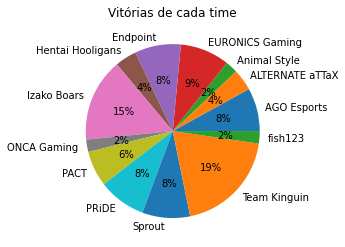

In [69]:
aux = csgo.groupby(['time_vencedor'])['round'].count().to_frame().reset_index().sort_values(by='time_vencedor')

plt.pie(aux['round'], labels = aux['time_vencedor'], autopct='%1.i%%')

plt.title('Vitórias de cada time')

plt.show()

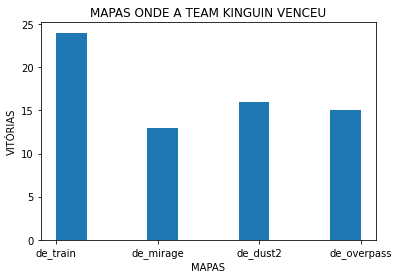

In [70]:
aux2 = csgo[csgo['time_vencedor'] == 'Team Kinguin']

plt.hist(aux2['mapa'])
plt.xlabel('MAPAS')
plt.ylabel('VITÓRIAS')
plt.title('MAPAS ONDE A TEAM KINGUIN VENCEU')

plt.show()

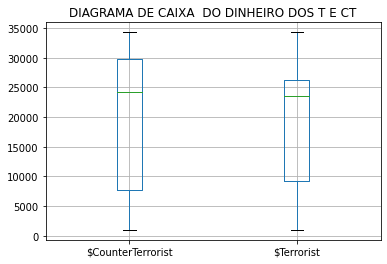

In [71]:
csgo.boxplot(column=['$CounterTerrorist', '$Terrorist'])
plt.title('DIAGRAMA DE CAIXA  DO DINHEIRO DOS T E CT')
plt.show()

## 5 Quebrar os dados em conjunto de treino e conjunto de teste

###Convertendo tabelas com palavras para números

In [72]:
csgo['time_vencedor'] = pd.to_numeric(csgo['time_vencedor'].map({'AGO Esports': 0, 'ALTERNATE aTTaX': 1, 'Animal Style': 2, 'EURONICS Gaming': 3,	'Endpoint': 4, 'Hentai Hooligans': 5, 'Izako Boars': 6, 'ONCA Gaming': 7, 'PACT': 8, 'PRiDE': 9, 'Sprout': 10, 'Team Kinguin': 11, 'fish123': 12}))
csgo['mapa'] = pd.to_numeric(csgo['mapa'].map({'de_overpass': 0, 'de_dust2': 1, 'de_cache': 2, 'de_train': 3, 'de_mirage': 4, 'de_nuke': 5}))

###Regressão linear utilizando o mapa jogado, o número do round, o tipo do round, a economia do time Terrorista e Contra-Terrorista e o time vencedor para fazer uma previsão do lado vencedor(Terrorista ou Contra-Terrorista):


In [73]:
import numpy as np
from sklearn.model_selection import train_test_split

nomes_colunas = ['mapa', 'round', 'round_tipo', 'time_vencedor', '$CounterTerrorist', '$Terrorist']
X = csgo[nomes_colunas].to_numpy()
y = csgo['lado_vencedor'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

print(f"Tamanho de X_train: {X_train.shape}")
print(f"Tamanho de X_test: {X_test.shape}")
print(f"Tamanho de y_train: {y_train.shape}")
print(f"Tamanho de y_test: {y_test.shape}")

Tamanho de X_train: (279, 6)
Tamanho de X_test: (70, 6)
Tamanho de y_train: (279,)
Tamanho de y_test: (70,)


## 6 Treinar um estimador do scikit-learn de aprendizagem supervisionada (regressor ou classificador) no conjunto de treino

In [74]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(n_jobs=-1, random_state=123)

In [75]:
clf.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=123)

## 7 Verificar o desempenho do estimador do scikit-learn no conjunto de teste

In [76]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2) * 100}%")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2) *100}%")

Acurácia de Treino: 66.0%

 ---------------------------

Acurácia de Teste: 63.0%


In [77]:
# Coeficientes do modelo
for feature, coef in zip(nomes_colunas, clf.coef_[0].tolist()):
    print(f"{feature}: {round(coef,3)}")

# Constante do modelo
print(f"Constante: {clf.intercept_}")

mapa: -0.0
round: 0.0
round_tipo: -0.0
time_vencedor: -0.0
$CounterTerrorist: 0.0
$Terrorist: -0.0
Constante: [1.37706418e-10]
